# Data Cleaning and Analysis
## Data Aggregation
In this mission, we learned how to use the groupby operation and the df.pivot_table() method for aggregation. In the next mission, we'll learn how to combine data sets using the pd.concat() and pd.merge() functions.
### Introduction to the Data
- Use the pd.read_csv() function to read the World_Happiness_2015.csv file into a dataframe called happiness2015.
- Store the first five rows of the dataframe in a variable called first_5.
- Use the DataFrame.info() method to print information about the dataframe.
- After you have run your code, use the variable inspector to look at the variable first_5 and the output to get familiar with the data.

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read the Dataset

In [2]:
happiness2015 = pd.read_csv("../datasets/World_Happiness_2015.csv")

### Stylistics

In [3]:
%matplotlib inline
plt.style.use("dark_background")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

### Explore the Dataset

In [4]:
first_5 = happiness2015.head()
first_5

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happiness2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [6]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Using Loops to Aggregate Data
- Create an empty dictionary named mean_happiness to store the results of this exercise.
- Use the Series.unique() method to create an array of unique values for the Region column.
- Use a for loop to iterate over the unique region values from the Region column.
    - Assign the rows belonging to the current region to a variable named region_group.
    - Use the Series.mean() method to calculate the mean happiness score for region_group.
    - Assign the mean value to the mean_happiness dictionary, using the region name as the key and the mean happiness score as the value.

In [7]:
mean_happiness = {}

for region in happiness2015["Region"].unique():
    region_group = happiness2015[happiness2015["Region"] == region]
    mean_happiness[region] = region_group["Happiness Score"].mean()

### Creating GroupBy Objects
- Use the df.groupby() method to group happiness2015 by the Region column. Assign the result to grouped.
- Use the GroupBy.get_group() method to select the data for the Australia and New Zealand group only. Assign the result to aus_nz.

In [8]:
grouped = happiness2015.groupby("Region")
aus_nz = grouped.get_group("Australia and New Zealand")

### Exploring GroupBy Objects
For the following exercise, use the result from the dictionary returned by grouped.groups shown below:

`'North America': Int64Index([4, 14], dtype='int64'`
- Prove that the values for the 'North America' group in the dictionary returned by grouped.groups above correspond to countries in North America in the happiness2015 dataframe.
    - Use the snippet above to identify the indexes of the countries in happiness2015 that belong to the North America group.
    - Use the indexes to assign just the countries in North America in happiness2015 to north_america.
- Use the GroupBy.get_group() method to select the data for the North America group only. Assign the result to na_group.
- Use the following code to compare north_america and na_group: north_america == na_group. Assign the result to equal.

In [9]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4, 14]]
na_group = grouped.get_group("North America")
equal = north_america == na_group

### Common Aggregation Methods with Groupby
- Apply the GroupBy.mean() method to grouped. Assign the result to means.


In [10]:
grouped = happiness2015.groupby('Region')
means = grouped.mean()

### Aggregating Specific Columns with Groupby
- Select just the Happiness Score column from grouped. Assign the result to happy_grouped.
- Use the GroupBy.mean() method to compute the mean of happy_grouped. Assign the result to happy_mean.

In [11]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped["Happiness Score"]
happy_mean = happy_grouped.mean()

### Introduction to the Agg() Method
- Apply the GroupBy.agg() method to happy_grouped. Pass a list containing np.mean and np.max into the method. Assign the result to happy_mean_max.
    - As noted above, passing 'mean' and 'max' into the GroupBy.agg() method will also return the same results. However, for answer checking purposes, you'll have to use np.mean and np.max.
- We've also created a custom function named dif to calculate the difference between the mean and maximum values. Pass dif into the GroupBy.agg() method. Assign the result to mean_max_dif.

In [12]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
def dif(group):
    return (group.max() - group.mean())

happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

### Computing Multiple and Custom Aggregations with the Agg() Method
- Inspect the following code: happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean().
    - If we run the code above, will the index of happiness_means be the unique values in the Region column or the Happiness Score column?
    - Will the values aggregated in happiness_means be the values from the Region column or the Happiness Score column?
    - Print happiness_means. Were your predictions correct?

In [13]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

### Aggregation with Pivot Tables
We've already updated pv_happiness by setting the margins parameter equal to True.

- Plot the resulting dataframe, pv_happiness, using the df.plot() method. Set kind to barh, xlim to (0,10), title to 'Mean Happiness Scores by Region', and legend to False. What do you notice about this results?
- Calculate the mean of the Happiness Score column in the original happiness 2015 data set. Assign the result to world_mean_happiness.
- Does world_mean_happiness equal the value for the All group? If you can't figure out the answer, don't worry! We'll review this question on the next screen.

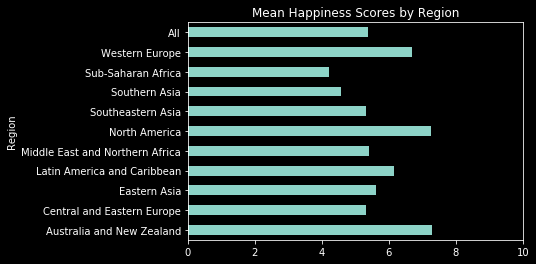

In [14]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind="barh", xlim=(0, 10), title="Mean Happiness Scores by Region", legend=False)
world_mean_happiness = happiness2015["Happiness Score"].mean()

### Aggregating Multiple Columns and Functions with Pivot Tables
- Use the df.groupby() method to calculate the minimum, maximum, and mean family and happiness scores for each region in happiness2015.
    - Group happiness2015 by the Region column.
    - Select the Happiness Score and Family columns. Assign the result to grouped.
    - Apply the GroupBy.agg() method to grouped. Pass a list containing np.min, np.max, and np.mean into the method.
    - Assign the result to happy_family_stats.
- Use the pivot_table method to return the same information, but also calculate the the minimum, maximum, and mean for the entire Family and Happiness Score columns.
    - The aggregation columns should be Happiness Score and Family.
    - The column to group by is Region.
    - The aggregation functions are np.min, np.max, and np.mean.
    - Set the margins parameter equal to True.
    - Assign the result to pv_happy_family_stats.

In [15]:
grouped = happiness2015.groupby("Region")[["Happiness Score", "Family"]]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(["Happiness Score", "Family"], "Region", aggfunc=[np.min, np.max, np.mean], margins=True)